# COMP5318 - Machine Learning and Data Mining

## Tutorial 3 - Linear Regression and Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score,train_test_split
%matplotlib inline

## 1. Linear Regression

#### 1.1 Data description

**House Prices dataset**:\
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

预测爱荷华州, 艾姆斯市的每个住宅的最终售价, 需要用79个变量来解释, 包括卧室数量, 白色栅栏, 地下室天花板高度, 和东西向铁路的距离

**Dataset files:**
- **train.csv** - the training set
- **test.csv** - the test set
- **data_description.txt** - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here

**Data fields**
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- TotalBsmtSF: Total square feet of basement area
- GrLivArea: Above grade (ground) living area square feet
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- SaleType: Type of sale
- SaleCondition: Condition of sale
...

Load training data and testing data to dataframe pandas

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1. 2. Feature Extraction

####  1.2.1. Extract all features using for predict price

In [5]:
train.loc[:, 'MSSubClass':'SaleCondition']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [6]:
test.loc[:, 'MSSubClass':'SaleCondition']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition'])) # 将训练集和测试集合并(只包括所有的特征, 不包括如ID, 标签之类的多余的东西)

In [8]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0) # 设置图的大小
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])}) # log1p这个函数的作用是输入的数组加一, 然后取自然对数
prices

,price,log(price + 1)
0,208500,12.247699
1,181500,12.109016
2,223500,12.317171
3,140000,11.849405
4,250000,12.429220
...,...,...
1455,175000,12.072547
1456,210000,12.254868
1457,266500,12.493133
1458,142125,11.864469


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'log(price + 1)'}>]], dtype=object)

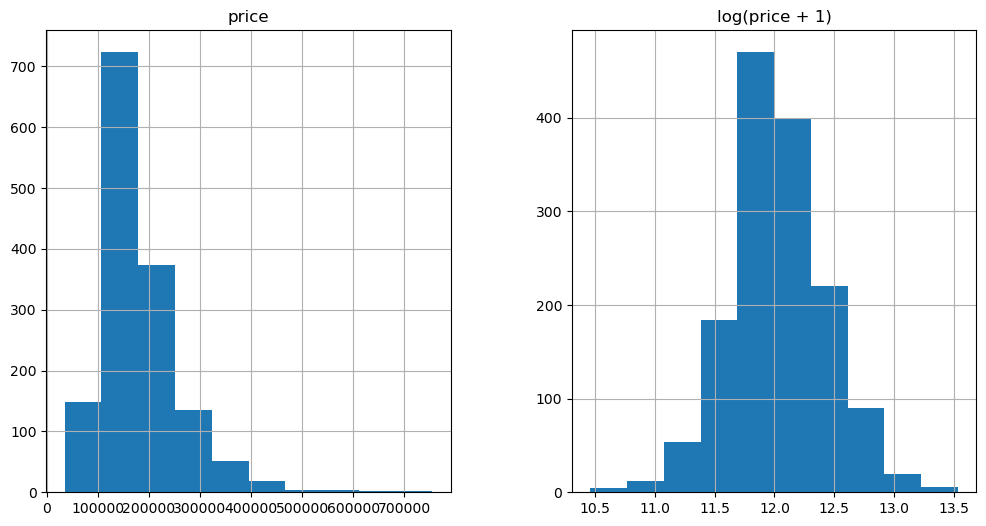

In [10]:
prices.hist() # 画出price和log(price+1)的直方图, 横坐标分别表示的是price和log(price+1)的值, 纵坐标表示的是在横坐标这个区间内样本的数量

#### 1.2.2 Data preprocessing: 

- First, transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal
- Create Dummy variables for the categorical features    
- Replace the numeric missing values (NaN's) with the mean of their respective columns

In [11]:
all_data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [12]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])
test["SalePrice"] = np.log1p(test["SalePrice"])
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index # 找出所有数值类型的列索引, 即列名称, 返回一个Index对象

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) # train[numeric_feats]返回的是所有数值列组成的DF, 对于返回的DF的每一列, 去除里面所有的NAN, 然后计算每一列的偏度
skewed_feats = skewed_feats[skewed_feats > 0.75] # 对于skewed_feats进行筛选, 只保留大于0.75的列
skewed_feats = skewed_feats.index # 取出大于0.75的列的索引

all_data[skewed_feats] = np.log1p(all_data[skewed_feats]) # all_data这个DF中对所有列偏度大于0.75的进行对数转换, 让其更加符合正态分布
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal
1,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal
2,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal
3,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml
4,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal


In [13]:
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [14]:
skewed_feats # 返回的是要进行对数转换的列, 即偏度大于0.75的列

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [15]:
all_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [16]:
pd.get_dummies(all_data["MSZoning"])

,C (all),FV,RH,RL,RM
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
1454,False,False,False,False,True
1455,False,False,False,False,True
1456,False,False,False,True,False
1457,False,False,False,True,False


In [17]:
#filling NA's with the mean of the column:
all_data = pd.get_dummies(all_data) # 将分类变量转换为虚拟变量, 或哑变量(见https://ml.ricolxwz.de/算法/线性回归/#哑变量)
all_data = all_data.fillna(all_data.mean()) # 处理表中的缺失值, 填充为该列的均值
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,False,False,False,True,False,False,False,False,True,False
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,False,False,False,True,False,False,False,False,True,False
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,False,False,False,True,False,False,False,False,True,False
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,False,False,False,True,True,False,False,False,False,False
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,False,False,False,True,False,False,False,False,True,False


In [18]:
train.shape # 元组的第一个元素返回的是train这个训练集的样本的数量

(1460, 81)

In [19]:
# Separate training and testing data:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y_train = train.SalePrice
y_test = test.SalePrice

Visualize the relationship between some input features and the price

/tmp/ipykernel_44713/972711045.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


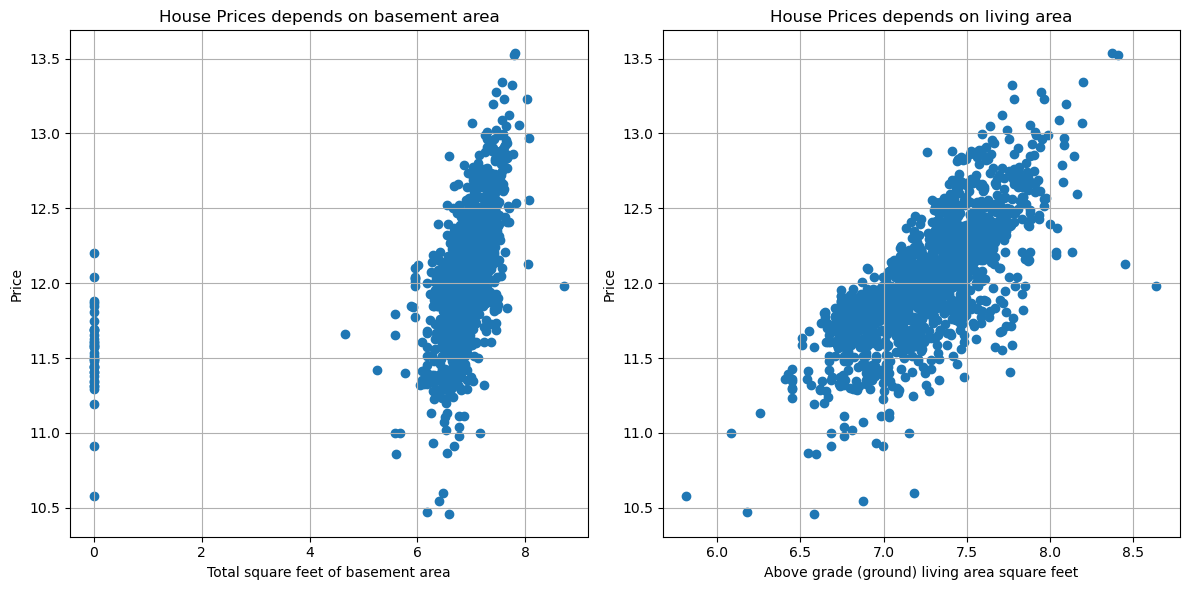

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=2) # 创建一个包含1行2列子图的画布, 返回一个包含画布对象和子图对象数组的元组
axs = axs.flatten() # 上一步的axs返回的是一个2D的数组, 这个flatten方法是将2D数组转为了1D数组, 以便于访问和操作每一个子图. 如果没有转换的话, 操作子图需要用到这样: 如axs[0, 0].plot...
axs[0].scatter(X_train.TotalBsmtSF, y_train)
axs[0].set(xlabel='Total square feet of basement area', ylabel='Price',title='House Prices depends on basement area')
axs[0].grid()

axs[1].scatter(X_train.GrLivArea, y_train)
axs[1].set(xlabel='Above grade (ground) living area square feet', ylabel='Price',title='House Prices depends on living area')
axs[1].grid()

fig.tight_layout() # 自动调节子图间距的函数, 它的作用是调整子图周围和子图的间距, 使整个子图(包括标签)能够完整地显示在画布中
fig.show()

In [21]:
# Made a prediction based on Living Area Feature 这边是仅仅根据Living Area这个特征进行预测, 也就是说只有一个特征, 是单变量线性回归

In [26]:
X_Train = X_train.GrLivArea.to_numpy().reshape(-1,1)
X_Test = X_test.GrLivArea.to_numpy().reshape(-1,1)
y_Train = y_train.to_numpy().reshape(-1,1)
y_Test = y_test.to_numpy().reshape(-1,1)

### 1. 3. Linear Regression model

Linear model: $$y = Xw$$
Minimize Mean Squares Regression: \
 $$min_w ||y - Xw||^2 + \frac{\lambda}{2} * ||w||^2 $$
 
这边用到的是岭回归, 即L2正则化, 倾向于让参数减小, 但是不会让参数变为0. 并且注意到上面的式子是标量形式

$\lambda$ is a regularization parameter

#### 1.3.1. Closed form solution:
* Closed form solution: $w = (X^TX + \lambda I)^{-1}X^Ty$

在这里, 我们直接用到了L2正则化的闭式解, 也就是岭回归的解析解, 通过求导, 令导数为0, 求解出w的值. 上面的式子是向量形式.

In [23]:
import matplotlib.pylab as pl
%matplotlib inline
#
#w_0 = model_ridge.intercept_
#    w_1 = model_ridge.coef_
def plot(w_0, w_1, str_label):
    x0 = np.linspace(5.5, 9, 10, endpoint=True).reshape(-1,1)
    y0 = w_0 + x0.dot(w_1)
    plt.plot(x0, y0, label = str_label, color = 'r')  
    #Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
    pl.scatter(X_Train, y_Train, marker='.', label = 'Training samples')
    pl.xlabel('Living Area')
    pl.ylabel('Price')
    pl.legend(loc='lower right')
    plt.title('Linear Problems')
    pl.grid()
    pl.show()

In [30]:
one = np.ones((X_train.shape[0],1)) # 生成一个全为1的列向量, 因为后面要Xw, 而w中的w0是没有x的, 所以需要一个全为1的列向量和w0点积表示截距
xTrainbar = np.concatenate((one, X_Train.reshape(-1, 1)), axis = 1) # 将X_Train和全为1的列向量进行拼接, 得到XTrainbar, 这个就是用于训练的特征
Lambda = 0.1
A = np.dot(xTrainbar.T, xTrainbar) #+ Lambda 计算岭回归中X^TX的值
A_reg =  A + Lambda* np.identity(len(A)) # 在上一步的基础上加上了lambda*I
b = np.dot(xTrainbar.T, y_Train) # 计算X^Ty
wCF = np.dot(np.linalg.pinv(A), b) # 求解闭式解, 其中np.linalg.pinv是求伪逆. 伪逆矩阵是矩阵的一种广义逆矩, 特别是在矩阵不是方阵时, 逆矩阵不存在, 但是伪逆矩阵存在
print("Closed form Solution:",wCF)

Closed form Solution: [[5.66281854]
 [0.87517762]]


In [35]:
xTrainbar

array([[1.        , 7.44483327],
       [1.        , 7.14124512],
       [1.        , 7.48829352],
       ...,
       [1.        , 7.75833347],
       [1.        , 6.98378997],
       [1.        , 7.13648321]])

In [31]:
xTrainbar.shape

(1460, 2)

In [36]:
A

array([[ 1460.        , 10612.02717045],
       [10612.02717045, 77295.72590935]])

In [34]:
wCF[0], wCF[1] # 一个是截距, 一个是斜率

(array([5.66281854]), array([0.87517762]))

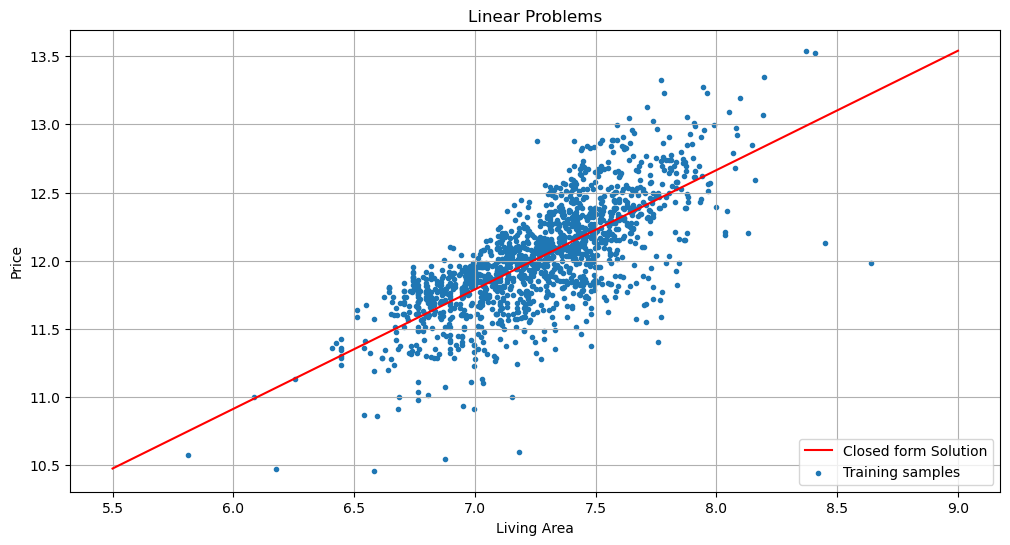

In [33]:
plot(wCF[0], wCF[1],"Closed form Solution")

#### 1.3.2 Finding solution using Gradient Descent:

首先, 回忆我们的目标函数: Minimize Mean Squares Regression: \
 $$min_w ||y - Xw||^2 + \frac{\lambda}{2} * ||w||^2 $$
 
不同于直接使用闭式解, 解析解, 这里使用梯度下降法来求解参数w. 注意到上面的式子是标量形式, 下面的式子是向量形式.
* Initialize $w =  w^{(0)}$ randomly:
* Choose learning rate $ \eta> 0$
*  Loop until convergence:

    Compute Gradient: $\nabla mse(w) = \frac{1}{N}(X^T(Xw-y) + \lambda * w)$, 注意这里面的已经全部都是向量的形式了, 也就是说$w$和$x$和$y$都是向量, 而不是标量, 都是一个矩阵, 详情见课件23页, 注意Vector Update和Scalar Update的区别, 其中$\omega_i$变成了$w_i^T$, 因为这不是普通的乘法, 是矩阵乘法, 所以需要转置
    
    Update parameters: $w^{t+1} = w^t - \eta * \nabla mse(w)$

In [38]:
# get all sample for each interation
def gradient_descent(x, y, w, iterations, eta, lamb): # 这边的eta是学习率, lamb是正则化参数
    past_loss = [] # 用于记录记录每一次迭代后的预测和真实值的差距
    past_w = [w] # 用于记录每一次迭代后的w
    n = y.size
    for i in range(iterations):
        prediction = np.dot(x, w) # 计算Xw
        error = prediction - y # 预测值和真实值之间的差距, 计算Xw-y
        loss = 1/(2*n) * np.dot(error.T, error) # 计算均方误差
        past_loss.append(loss) # 将这次迭代的均方误差记录下来
        GradRmse = np.dot(x.T, error) + lamb*w # 计算梯度
        w = w - (eta * (1/n) * GradRmse) # 梯度下降
        past_w.append(w) # 将这次迭代的w记录下来
        
    return past_w, past_loss

In [18]:
# Todo: Implemenation for SGD, Mini-batch Sgd

[[5.97590118]
 [0.83219035]]


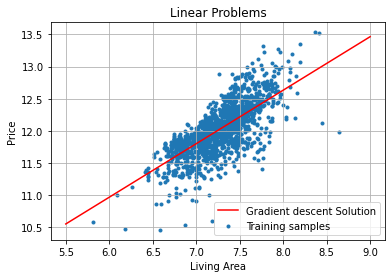

In [20]:
eta = 0.01 #Step size
iterations = 100 #No. of iterations
w_init = np.array([6, 1]).reshape(-1,1)
(wGD, pastLoss) = gradient_descent(xTrainbar, y_Train, w_init, iterations, eta, Lambda)
print(wGD[-1])
plot(wGD[-1][0], wGD[-1][1],"Gradient descent Solution")

#### 1.3.2 Finding solution using sklearn:

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
[5.66674083] [[0.874638]]


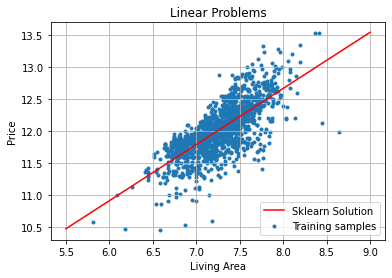

In [21]:
model_ridge = Ridge(alpha = Lambda)
model_ridge.fit(X_Train, y_Train)
print(model_ridge.get_params())
print(model_ridge.intercept_,model_ridge.coef_)
plot(model_ridge.intercept_, model_ridge.coef_,"Sklearn Solution")

#### 1.4. Evaluation on test dataset

In [22]:
# Todo: Evaluate Rmse on test data.

## 2. Logistic Regression

Logistic regression is used for classification tasks. Despite its name, logistic regression is a classification algorithm and should not be confused with linear regression.

#### Generate synthetic data belonged to 2 classes

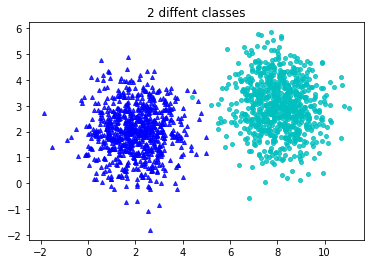

In [23]:
C = 2# number of classes
N = 1000  # number of points per class 
means = [[2, 2], [8, 3]]
cov = [[1, 0], [0, 1]]

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

X = np.concatenate((X0, X1), axis = 0) # each row is a datapoint
y = np.asarray([0]*N + [1]*N)

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

def display(X, label):
    X0 = X[np.where(label == 0)[0]]
    X1 = X[np.where(label == 1)[0]]
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'co', markersize = 4, alpha = .8)
    plt.plot()
    
display(X_train,y_train)
plt.title("2 diffent classes")
plt.show()

### 2.1 Logistic model

Minimize cross-entropy error:
$$f(w) = - \sum_{i=1}^n\{y_i\log \sigma(x_iw) + (1-y_i)\log [1- \sigma(x_iw)]\}$$

$$\sigma(z) = \frac{1}{exp(-z)}$$

Gradient of $f(w)$:
$$\nabla f(w) = \sum_{i=1}^n \{\sigma(x_iw) -y_i\}x_i$$

###  2.2 Gradient descent for logistic regression

In [24]:
def sigmoid(S):
    """
    S: an numpy array
    return sigmoid function of each element of S
    """
    return 1/(1 + np.exp(-S))

def prob(w, X):
    """
    X: a 2d numpy array of shape (N, d). N datatpoint, each with size d
    w: a 1d numpy array of shape (d)
    """
    return sigmoid(X.dot(w))

def loss(w, X, y, lam):
    """
    X, w as in prob
    y: a 1d numpy array of shape (N). Each elem = 0 or 1
    """
    z = prob(w, X)
    return -np.mean(y*np.log(z) + (1-y)*np.log(1-z)) + 0.5*lam/X.shape[0]*np.sum(w*w)

def logistic_regression(w_init, X, y, lam = 0.001, lr = 0.1, nepoches = 2000):
    # lam - reg paramether, lr - learning rate, nepoches - number of epoches
    N, d = X.shape[0], X.shape[1]
    w = w_old = w_init
    loss_hist = [loss(w_init, X, y, lam)] # store history of loss in loss_hist
    ep = 0
    while ep < nepoches:
        ep += 1
        mix_ids = np.random.permutation(N)
        for i in mix_ids:
            xi = X[i]
            yi = y[i]
            zi = sigmoid(xi.dot(w))
            w = w - lr*((zi - yi)*xi + lam*w)
        loss_val = loss(w, X, y, lam)
        loss_hist.append(loss_val)
        if np.linalg.norm(w - w_old)/d < 1e-6:
            break
        w_old = w
    return w, loss_hist

def predict(w, X, threshold = 0.5):
    """
    predict output of each row of X
    X: a numpy array of shape (N, d)
    threshold: a threshold between 0 and 1
    return a 1d numpy array, each element is 0 or 1
    """
    res = np.zeros(X.shape[0])
    res[np.where(prob(w, X) > threshold)[0]] = 1
    return res

In [25]:
def plot_logistic(w):
    xm = np.arange(-2, 12, 0.025)
    xlen = len(xm)
    ym = np.arange(-2, 7, 0.025)
    ylen = len(ym)
    xx, yy = np.meshgrid(xm, ym)
    xx1 = xx.ravel().reshape(-1, 1)
    yy1 = yy.ravel().reshape(-1, 1)
    XX = np.concatenate(( xx1, yy1, np.ones(( xx.size, 1))), axis = 1)
    Z = predict(w, XX)
    Z = Z.reshape(xx.shape)
    CS = plt.contourf(xx, yy, Z, 100, alpha = .1)
    plt.title("Final patten for each class")
    display(X, y)
    plt.show()

[  2.59529356   0.06964435 -13.09540574]
Accuracy 99.80 %


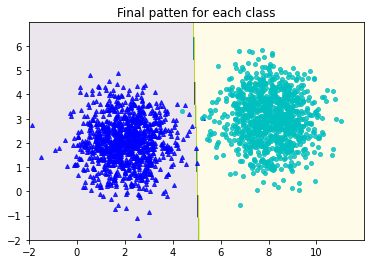

In [26]:
# bias trick
Xbar_train = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis = 1)
Xbar_test = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis = 1)

# randomly initial weight parameters
w_init = np.random.randn(Xbar_train.shape[1])

# training model
w, loss_hist = logistic_regression(w_init, Xbar_train, y_train, lam = 0.0001, lr = 0.05, nepoches = 1000)
y_predict = predict(w, Xbar_test)

print(w)
print("Accuracy %.2f %%" % (100*accuracy_score(y_test, y_predict)))
plot_logistic(w)

### 2.3 Compare with model from sklearn

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Accuracy on trainig set:", logreg.score(X_train, y_train)*100)
print("Accuracy on test set:", logreg.score(X_test, y_test)*100)

Accuracy on trainig set: 99.8
Accuracy on test set: 99.8


/Users/charlie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
